In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:.2f}'.format 
#pd.options.display.max_rows = None

In [3]:
lend_loan_df = pd.read_csv('loan.csv', low_memory=False)
print(lend_loan_df.shape)

(39717, 111)


In [4]:
null_columns = lend_loan_df.isnull().sum() 
null_columns[null_columns>0]

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

In [7]:
drop_maxnull_columns = ['emp_title','desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','mths_since_last_major_derog',
                'annual_inc_joint','dti_joint','verification_status_joint','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m',
                'open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc',
                'all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy',
                        'bc_util','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc',
                        'mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq',
                        'num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl',
                        'num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd',
                        'num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim',
                        'total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit']

print(f'max null columns counts {len(drop_maxnull_columns)} for dropping')

lend_loan_df.drop(drop_maxnull_columns, axis=1, inplace=True)

lend_loan_df.info()

max null columns counts 59 for dropping
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  floa

In [8]:
unwanted_columns = ['url','member_id','zip_code']

print(f'not required info columns counts {len(unwanted_columns)} for dropping')

lend_loan_df.drop(unwanted_columns, axis=1, inplace=True)

lend_loan_df.info()

not required info columns counts 3 for dropping
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-nu

In [13]:
temp = lend_loan_df.nunique() # gives unique count of all the columns
unique_condition_1 = temp == 1 # which columns have just 1 unique value
temp = temp[unique_condition_1]
print(temp)
# let's verify the column data once for unique_condition_1 column
#lend_loan_df[temp.index]

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64


In [15]:
print(lend_loan_df.pymnt_plan.value_counts())
print(lend_loan_df.initial_list_status.value_counts())
print(lend_loan_df.application_type.value_counts())
# look like pymnt_plan not impacting for analyze because all values are n
# look like initial_list_status not impacting for analyze because all values are f
#look like application_type not impacting for analyze because all values are INDIVIDUAL
#lend_loan_df.drop(['pymnt_plan','initial_list_status','application_type','collections_12_mths_ex_med','policy_code','acc_now_delinq',
                  #'chargeoff_within_12_mths',],axis=1, inplace=True)
lend_loan_df.drop(columns = temp.index,axis=1, inplace=True)
lend_loan_df.info()



pymnt_plan
n    39717
Name: count, dtype: int64
initial_list_status
f    39717
Name: count, dtype: int64
application_type
INDIVIDUAL    39717
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc      

In [17]:
# convert term to int by removing ' month'
#convert int_rate to float by removing '%'
#convert revol_util to float by removing '%'

lend_loan_df.term = lend_loan_df.term.apply(lambda x: int(x.replace(' months','')))
lend_loan_df.int_rate = lend_loan_df.int_rate.apply(lambda x: float(x.replace('%','')))

lend_loan_df.revol_util.fillna('0',inplace=True)

lend_loan_df.revol_util = lend_loan_df.revol_util.apply(lambda x: float(x.replace('%','')))
lend_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  int64  
 5   int_rate                 39717 non-null  float64
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

C:\Users\srimo\AppData\Local\Temp\ipykernel_12460\2556179909.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lend_loan_df.revol_util.fillna('0',inplace=True)


In [19]:
print(lend_loan_df.emp_length.value_counts())
print(lend_loan_df.emp_length.isnull().sum())
lend_loan_df.emp_length.fillna('0',inplace=True)
print(lend_loan_df.emp_length.isnull().sum())

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64
1075
0


C:\Users\srimo\AppData\Local\Temp\ipykernel_12460\858303080.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lend_loan_df.emp_length.fillna('0',inplace=True)


In [21]:

import re
lend_loan_df['emp_length']=lend_loan_df.emp_length.str.extract('(\d+)')
lend_loan_df['emp_length']=lend_loan_df.emp_length.astype('int64')
lend_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  int64  
 5   int_rate                 39717 non-null  float64
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               39717 non-null  int64  
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\srimo\AppData\Local\Temp\ipykernel_12460\573197509.py:2: SyntaxWarning: invalid escape sequence '\d'
  lend_loan_df['emp_length']=lend_loan_df.emp_length.str.extract('(\d+)')


In [23]:
lend_loan_df.issue_d = pd.to_datetime(lend_loan_df.issue_d, format='%b-%y')
lend_loan_df['issue_year']=lend_loan_df['issue_d'].dt.year
lend_loan_df['issue_month']=lend_loan_df['issue_d'].dt.month
lend_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   loan_amnt                39717 non-null  int64         
 2   funded_amnt              39717 non-null  int64         
 3   funded_amnt_inv          39717 non-null  float64       
 4   term                     39717 non-null  int64         
 5   int_rate                 39717 non-null  float64       
 6   installment              39717 non-null  float64       
 7   grade                    39717 non-null  object        
 8   sub_grade                39717 non-null  object        
 9   emp_length               39717 non-null  int64         
 10  home_ownership           39717 non-null  object        
 11  annual_inc               39717 non-null  float64       
 12  verification_status      39717 n

In [25]:
temp = 100*lend_loan_df.isnull().mean()
# there are 53 columns, we just want to see the columns which have missing values
missing_value_condition = temp > 0.0
temp[missing_value_condition].sort_values()

last_credit_pull_d     0.01
title                  0.03
last_pymnt_d           0.18
pub_rec_bankruptcies   1.75
dtype: float64

In [27]:
print(lend_loan_df.shape)
lend_loan_df = lend_loan_df[~lend_loan_df['last_credit_pull_d'].isnull()]
lend_loan_df = lend_loan_df[~lend_loan_df['title'].isnull()]
#lend_loan_df = lend_loan_df[~lend_loan_df['revol_util'].isnull()]
lend_loan_df = lend_loan_df[~lend_loan_df['last_pymnt_d'].isnull()]
lend_loan_df = lend_loan_df[~lend_loan_df['pub_rec_bankruptcies'].isnull()]
#lend_loan_df = lend_loan_df[~lend_loan_df['emp_length'].isnull()]
#lend_loan_df = lend_loan_df[~lend_loan_df['emp_title'].isnull()]
print(lend_loan_df.shape)

(39717, 42)
(38937, 42)


issue_year
2011    21618
2010    11501
2009     4700
2008     1111
2007        7
Name: count, dtype: int64
56% loan issued in 2011 
30% loan issued in 2010 
12% loan issued in 2009 
3% loan issued in 2008 
0% loan issued in 2007 


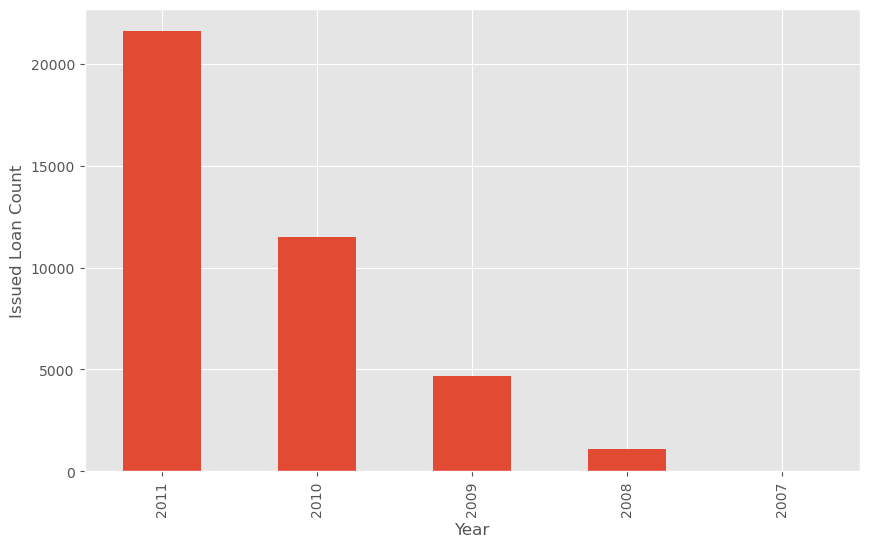

In [29]:
print(lend_loan_df.issue_year.value_counts())
#in 2011 more loans are issued
print(f'{ int(round( (len(lend_loan_df[lend_loan_df.issue_year == 2011]) / len(lend_loan_df.issue_year))*100 ,0))}% loan issued in 2011 ')
print(f'{ int(round( (len(lend_loan_df[lend_loan_df.issue_year == 2010]) / len(lend_loan_df.issue_year))*100 ,0))}% loan issued in 2010 ')
print(f'{ int(round( (len(lend_loan_df[lend_loan_df.issue_year == 2009]) / len(lend_loan_df.issue_year))*100 ,0))}% loan issued in 2009 ')
print(f'{ int(round( (len(lend_loan_df[lend_loan_df.issue_year == 2008]) / len(lend_loan_df.issue_year))*100 ,0))}% loan issued in 2008 ')
print(f'{ int(round( (len(lend_loan_df[lend_loan_df.issue_year == 2007]) / len(lend_loan_df.issue_year))*100 ,0))}% loan issued in 2007 ')

plt.style.use('ggplot')
plt.figure(figsize=[10,6])
lend_loan_df.issue_year.value_counts().plot(kind='bar', xlabel='Year', ylabel='Issued Loan Count', rot=90)
plt.show()

loan_status
Fully Paid     32362
Charged Off     5435
Current         1140
Name: count, dtype: int64


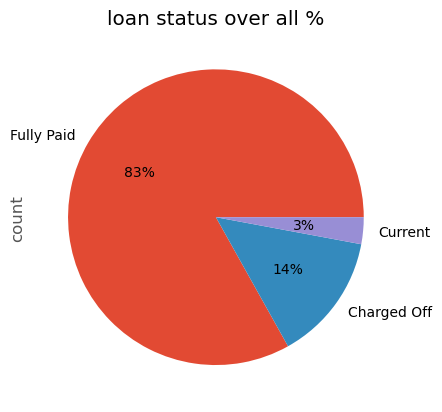

In [31]:
print(lend_loan_df.loan_status.value_counts())

lend_loan_df.loan_status.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('loan status over all %')
plt.show()

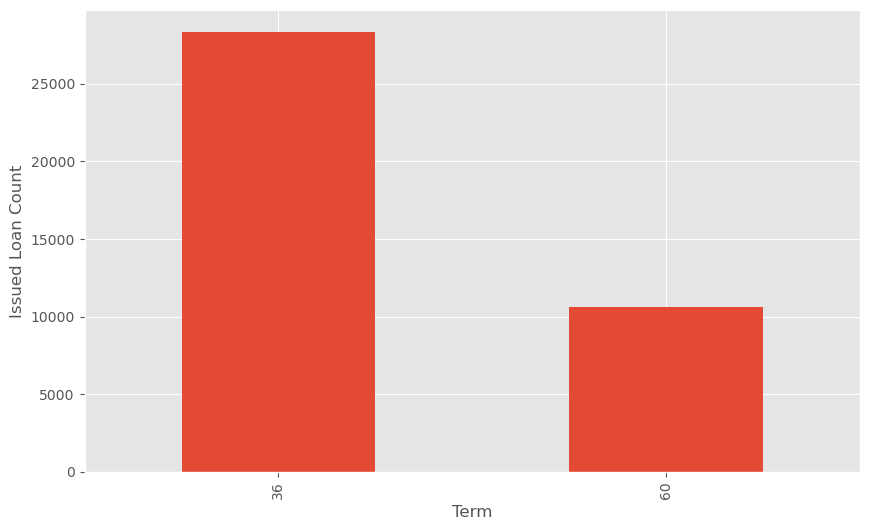

In [33]:
plt.figure(figsize=[10,6])
lend_loan_df.term.value_counts().plot(kind='bar', xlabel='Term', ylabel='Issued Loan Count', rot=90)
plt.show()

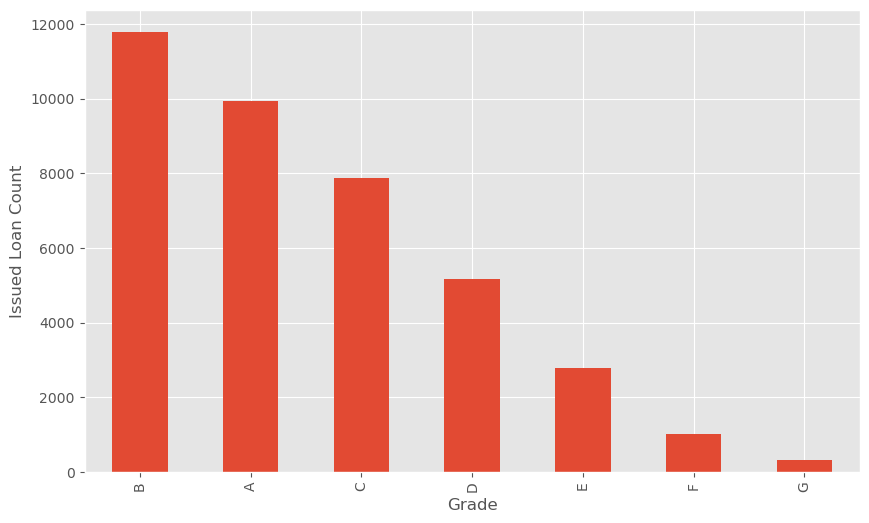

In [35]:
plt.figure(figsize=[10,6])
lend_loan_df.grade.value_counts().plot(kind='bar', xlabel='Grade', ylabel='Issued Loan Count', rot=90)
plt.show()

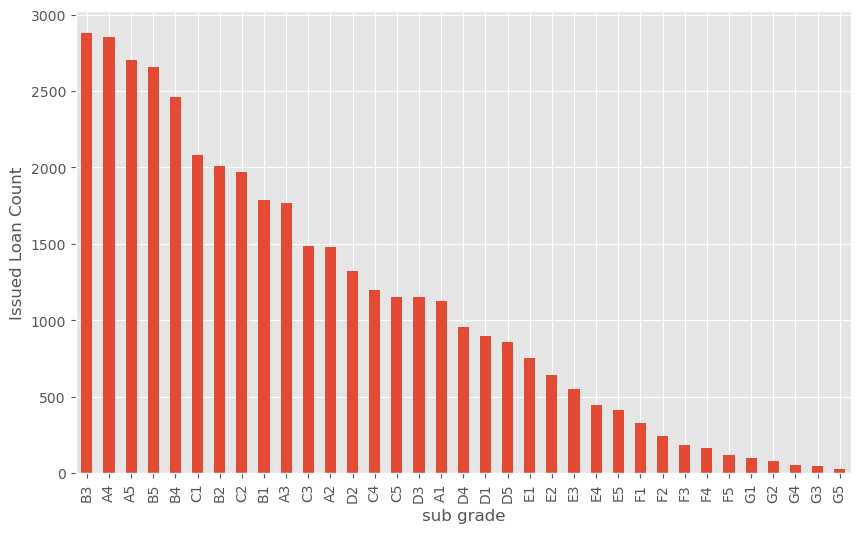

In [37]:
plt.figure(figsize=[10,6])
lend_loan_df.sub_grade.value_counts().plot(kind='bar', xlabel='sub grade', ylabel='Issued Loan Count', rot=90)
plt.show()

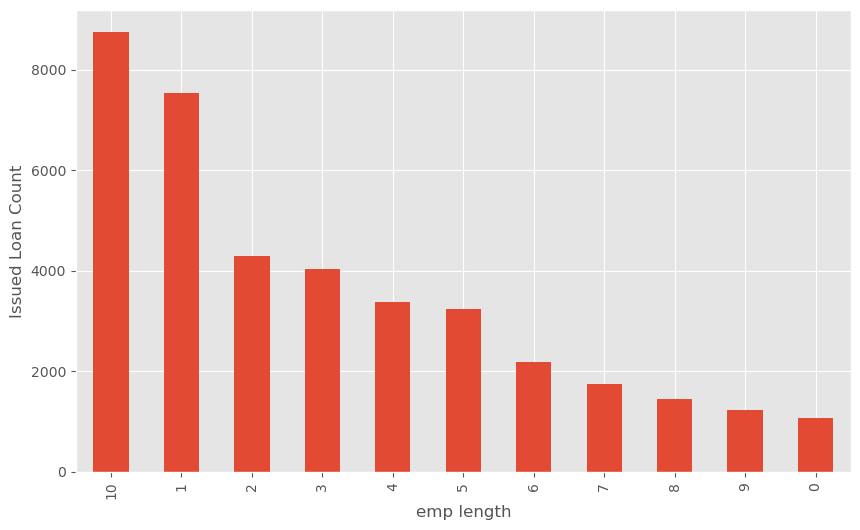

In [39]:
plt.figure(figsize=[10,6])
lend_loan_df.emp_length.value_counts().plot(kind='bar', xlabel='emp length', ylabel='Issued Loan Count', rot=90)
plt.show()

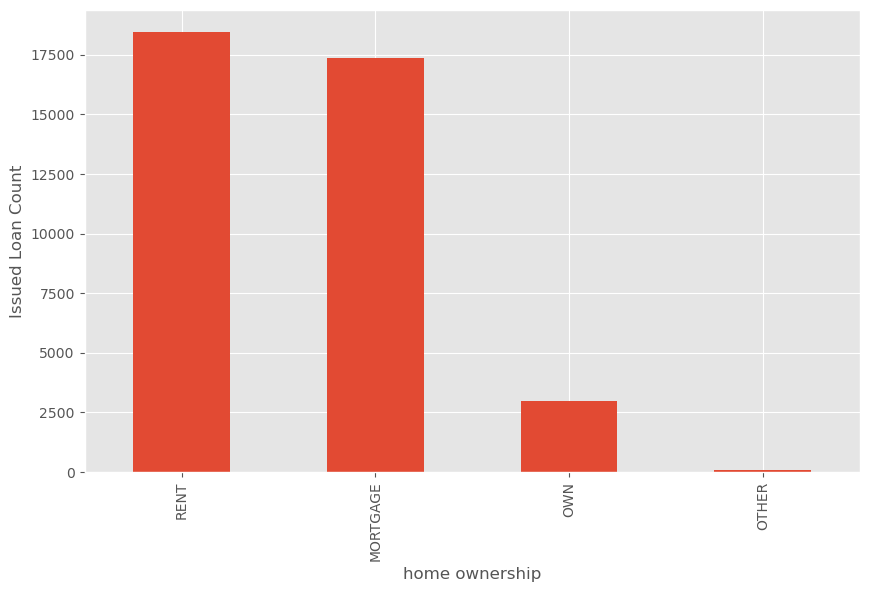

In [41]:
plt.figure(figsize=[10,6])
lend_loan_df.home_ownership.value_counts().plot(kind='bar', xlabel='home ownership', ylabel='Issued Loan Count', rot=90)
plt.show()

In [43]:
lend_loan_df.verification_status.value_counts()

verification_status
Not Verified       16182
Verified           12786
Source Verified     9969
Name: count, dtype: int64

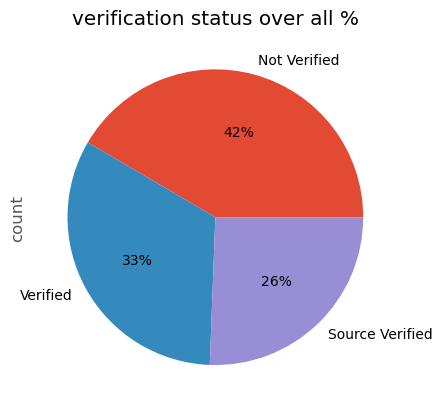

In [45]:
lend_loan_df.verification_status.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('verification status over all %')
plt.show()

47% loan issued in debt_consolidation


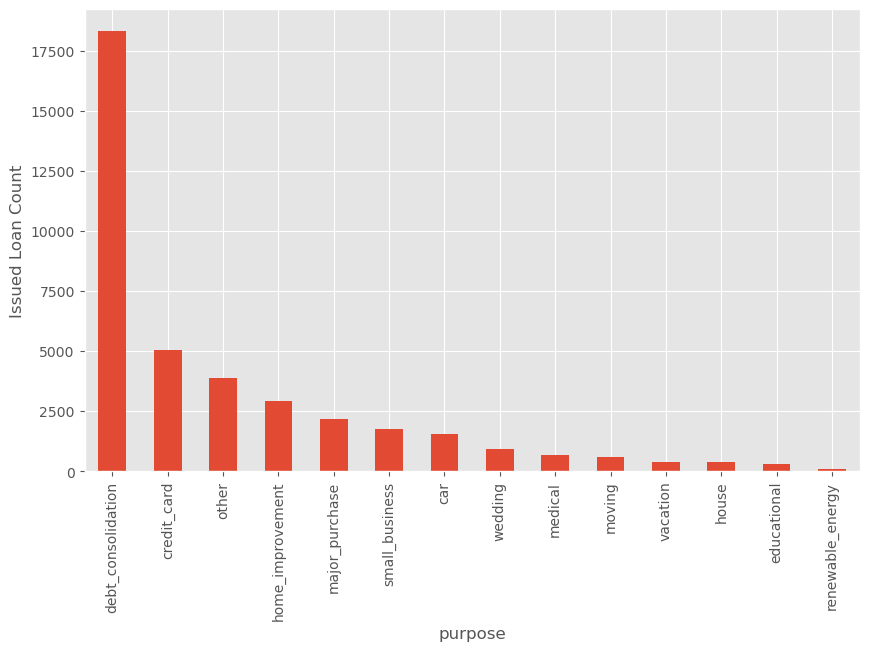

In [47]:
lend_loan_df.purpose.value_counts()

print(f'{ int(round( (len(lend_loan_df[lend_loan_df.purpose == 'debt_consolidation']) / len(lend_loan_df.purpose))*100 ,0))}% loan issued in debt_consolidation')

plt.figure(figsize=[10,6])
lend_loan_df.purpose.value_counts().plot(kind='bar', xlabel='purpose', ylabel='Issued Loan Count', rot=90)
plt.show()

In [49]:
lend_loan_df.title.value_counts()

title
Debt Consolidation                        2159
Debt Consolidation Loan                   1721
Personal Loan                              634
Consolidation                              505
debt consolidation                         499
                                          ... 
Karen's Freedom Loan                         1
family auto                                  1
Rainy Day                                    1
DustinÃÂ´s loan                             1
Merging 2 Accounts into one to save $$       1
Name: count, Length: 19169, dtype: int64

In [51]:
lend_loan_df[lend_loan_df.purpose == 'other'][['purpose','title']].title.value_counts()

title
Personal Loan                     233
Other Loan                        190
Personal                          132
personal                           92
personal loan                      82
                                 ... 
Borrowing to expand investment      1
Rehab Investment Property           1
transmission                        1
Refinance                           1
2002 Jayco Pop up camper            1
Name: count, Length: 2393, dtype: int64

In [53]:
lend_loan_df[lend_loan_df.purpose == 'debt_consolidation'][['purpose','title']]

,purpose,title
6,debt_consolidation,Loan
10,debt_consolidation,High intrest Consolidation
11,debt_consolidation,Consolidation
12,debt_consolidation,freedom
15,debt_consolidation,Debt Consolidation Loan
...,...,...
39562,debt_consolidation,Want to pay off high intrest cards
39573,debt_consolidation,Taking the First Step by Consolidating
39623,debt_consolidation,Pay off debt
39666,debt_consolidation,paying credit cards and doctor bill.


18% loan issued in CA


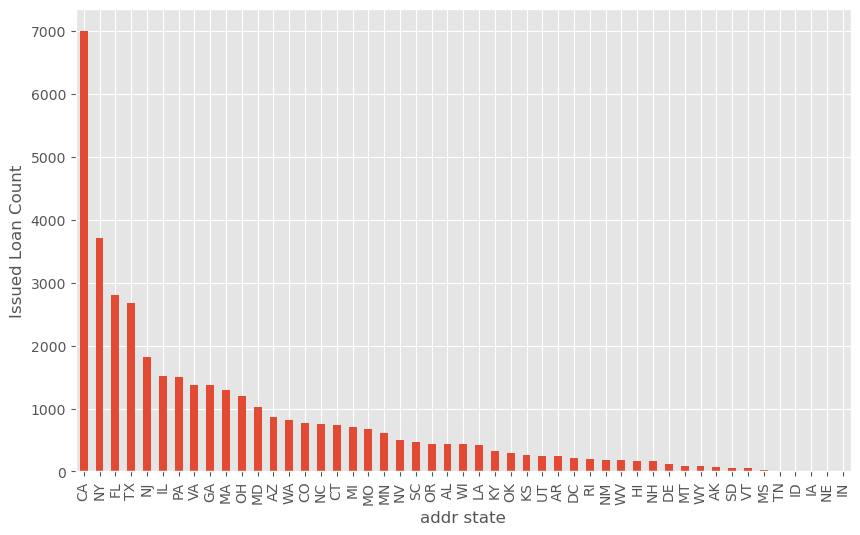

In [55]:
lend_loan_df.addr_state.value_counts()
print(f'{ int(round( (len(lend_loan_df[lend_loan_df.addr_state == 'CA']) / len(lend_loan_df.purpose))*100 ,0))}% loan issued in CA')

plt.figure(figsize=[10,6])
lend_loan_df.addr_state.value_counts().plot(kind='bar', xlabel='addr state', ylabel='Issued Loan Count', rot=90)
plt.show()

count   38937.00
mean    11247.97
std      7471.74
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64


<Axes: ylabel='loan_amnt'>

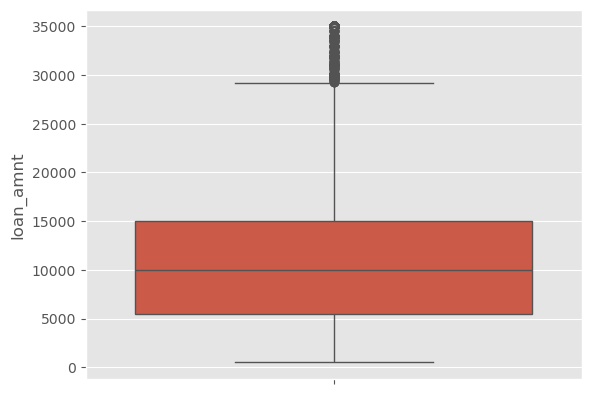

In [57]:
# Basic statistics with .describe() - Quantitative Variables
print(lend_loan_df.loan_amnt.describe())
sns.boxplot(lend_loan_df.loan_amnt)

count     38937.00
mean      69004.25
std       63204.03
min        4000.00
25%       40800.00
50%       59004.00
75%       82500.00
max     6000000.00
Name: annual_inc, dtype: float64


<Axes: ylabel='annual_inc'>

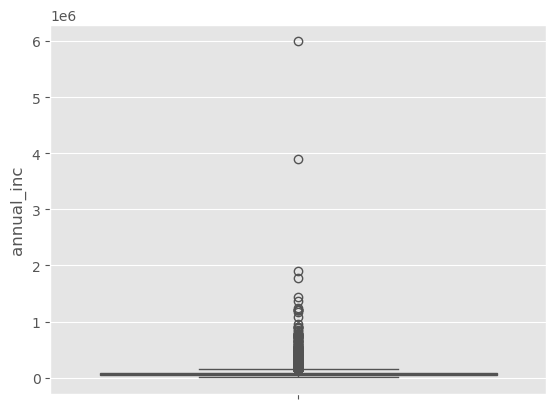

In [59]:
#before removing outlier in annual income
print(lend_loan_df.annual_inc.describe())
sns.boxplot(lend_loan_df.annual_inc)

In [61]:
#after removing annual income
print(f'80% annual incomde is {lend_loan_df.annual_inc.quantile(0.80)}')
print(f'85% annual incomde is {lend_loan_df.annual_inc.quantile(0.85)}')
print(f'95% annual incomde is {lend_loan_df.annual_inc.quantile(0.95)}')
print(f'96% annual incomde is {lend_loan_df.annual_inc.quantile(0.96)}')
print(f'97% annual incomde is {lend_loan_df.annual_inc.quantile(0.97)}')
print(f'98% annual incomde is {lend_loan_df.annual_inc.quantile(0.98)}')
print(f'99% annual incomde is {lend_loan_df.annual_inc.quantile(0.99)}')
print(f'100% annual incomde is {lend_loan_df.annual_inc.quantile(1)}')


80% annual incomde is 90000.0
85% annual incomde is 100000.0
95% annual incomde is 142000.0
96% annual incomde is 150000.0
97% annual incomde is 165000.0
98% annual incomde is 186513.59999999986
99% annual incomde is 234853.43999999977
100% annual incomde is 6000000.0


In [63]:
 q1=lend_loan_df.annual_inc.quantile(0.25)
 q3=lend_loan_df.annual_inc.quantile(0.75)
 IQR=q3-q1
 outliers = lend_loan_df[((lend_loan_df.annual_inc<(q1-1.5*IQR)) | (lend_loan_df.annual_inc>(q3+1.5*IQR)))]
print(outliers.annual_inc)

74      150000.00
80      150000.00
170     225000.00
185     168000.00
298     150000.00
           ...   
38935   150000.00
38950   205000.00
38953   151000.00
38954   175000.00
38973   150000.00
Name: annual_inc, Length: 1807, dtype: float64


In [65]:
outliers = lend_loan_df[lend_loan_df.annual_inc > lend_loan_df.annual_inc.quantile(0.99)]
print(outliers.annual_inc)

392     276000.00
717     235000.00
836     235000.00
1210    243600.00
1348    264000.00
           ...   
38048   244000.00
38177   250000.00
38320   240000.00
38322   350000.00
38691   500000.00
Name: annual_inc, Length: 390, dtype: float64


<Axes: ylabel='annual_inc'>

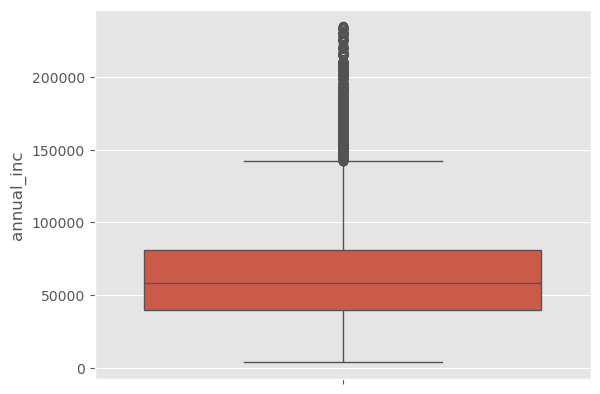

In [67]:
# remove outlier above 99% quantile
lend_loan_df = lend_loan_df[lend_loan_df.annual_inc < lend_loan_df.annual_inc.quantile(0.99)]
sns.boxplot(lend_loan_df.annual_inc)

In [73]:
lend_loan_df.shape

(38547, 42)

In [69]:
outliers.loan_status.value_counts()

loan_status
Fully Paid     335
Charged Off     41
Current         14
Name: count, dtype: int64

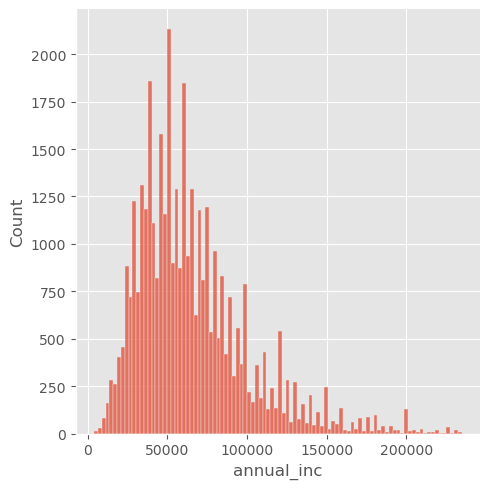

In [71]:
sns.displot(lend_loan_df.annual_inc)

<Axes: xlabel='annual_inc', ylabel='Density'>

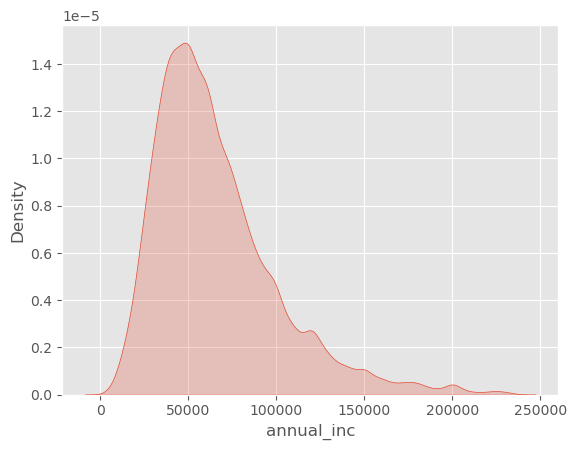

In [76]:
sns.kdeplot(lend_loan_df.annual_inc, fill=True)